        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


<ipython-input-6-7828d4761b81>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


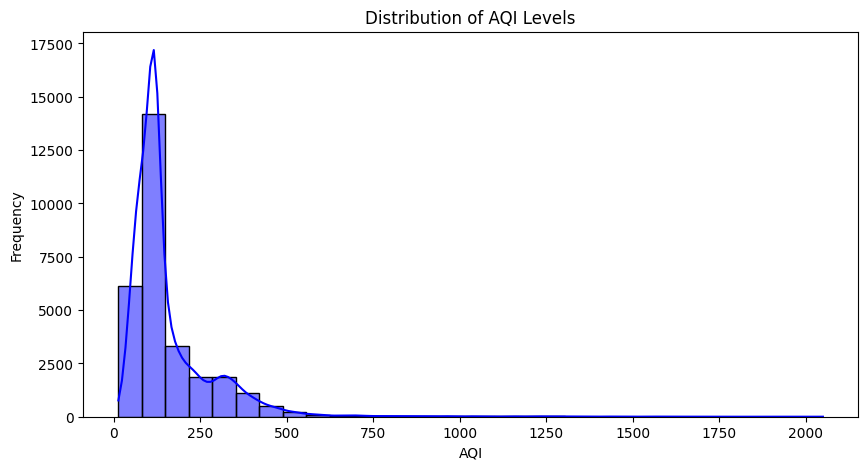

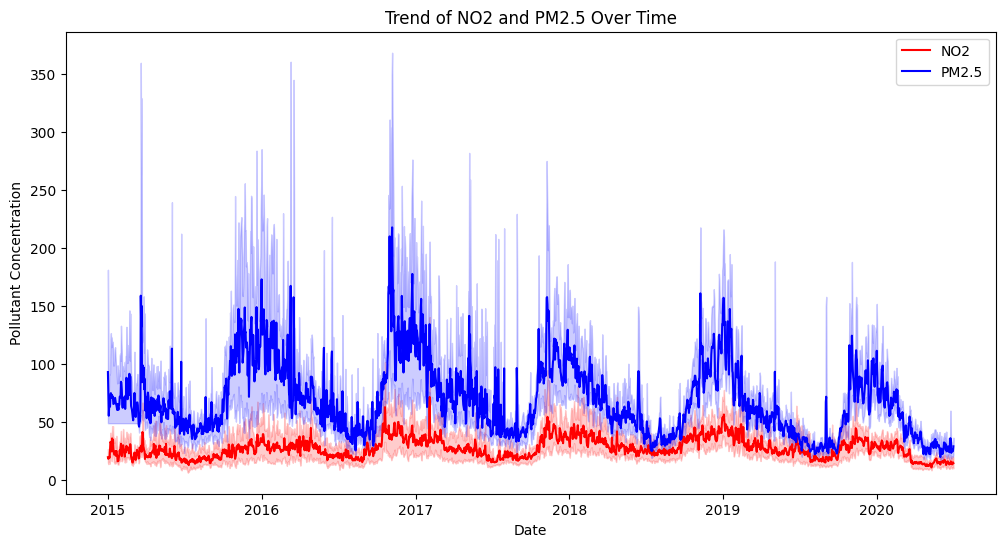

Random Forest RMSE: 41.42962947405975, R2: 0.8885044427019493
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


739/739 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 41479.4531 - val_loss: 7223.6968
Epoch 2/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - loss: 7542.4238 - val_loss: 5969.1904
Epoch 3/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - loss: 6656.5249 - val_loss: 5256.9229
Epoch 4/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 5841.2915 - val_loss: 4821.0684
Epoch 5/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - loss: 5050.3726 - val_loss: 3640.5393
Epoch 6/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 4491.1489 - val_loss: 4285.8857
Epoch 7/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 4439.4370 - val_loss: 4181.8760
Epoch 8/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - loss: 4319.0220 - val_loss: 3256.0771
Epoch 9/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - loss: 3586.6882 - val_loss: 2825.4119
Epoch 10/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - loss: 4133.0146 - val_loss: 3208.7727
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
LSTM RMSE: 56.64602308627778

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/city_day.csv')  # Update with actual path
print(df.head())

# Data Preprocessing
# Handling missing values with forward fill and median imputation
imputer = SimpleImputer(strategy='median')
df[['PM2.5', 'PM10', 'AQI']] = imputer.fit_transform(df[['PM2.5', 'PM10', 'AQI']])
df.fillna(method='ffill', inplace=True)

# Feature Engineering - Creating Time-based Features
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Selecting Features and Target
features = ['NO2', 'CO', 'O3', 'PM10', 'PM2.5', 'year', 'month', 'day']
target = 'AQI'

X = df[features]
y = df[target]

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Visualization
plt.figure(figsize=(10,5))
sns.histplot(df['AQI'], bins=30, kde=True, color='blue')
plt.title('Distribution of AQI Levels')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x=df['Date'], y=df['NO2'], label='NO2', color='red')
sns.lineplot(x=df['Date'], y=df['PM2.5'], label='PM2.5', color='blue')
plt.title('Trend of NO2 and PM2.5 Over Time')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.legend()
plt.show()

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation - Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)
print(f'Random Forest RMSE: {rf_rmse}, R2: {rf_r2}')

# LSTM Model
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

y_pred_lstm = model.predict(X_test_lstm)

# Evaluation - LSTM
lstm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
lstm_r2 = r2_score(y_test, y_pred_lstm)
print(f'LSTM RMSE: {lstm_rmse}, R2: {lstm_r2}')

# Exporting Predictions for Tableau
results = pd.DataFrame({'Actual': y_test, 'RF_Predicted': y_pred_rf, 'LSTM_Predicted': y_pred_lstm.flatten()})
results.to_csv('AirQuality_Predictions.csv', index=False)
